<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-Customer-Churn" data-toc-modified-id="Mobile-Customer-Churn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mobile Customer Churn</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outlier Detection</a></span><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Plan-Fee" data-toc-modified-id="Plan-Fee-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Plan Fee</a></span></li><li><span><a href="#Service-Tenure" data-toc-modified-id="Service-Tenure-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Service Tenure</a></span></li><li><span><a href="#Plan-Tenure" data-toc-modified-id="Plan-Tenure-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Plan Tenure</a></span></li><li><span><a href="#Monthly-Spend" data-toc-modified-id="Monthly-Spend-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Monthly Spend</a></span></li></ul></li><li><span><a href="#Missing-Values-Analysis" data-toc-modified-id="Missing-Values-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing Values Analysis</a></span></li><li><span><a href="#Analysis-of-Categorical-Variables" data-toc-modified-id="Analysis-of-Categorical-Variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Analysis of Categorical Variables</a></span></li><li><span><a href="#Transform-Categorical-Values-to-Binary-or-Multi-Class" data-toc-modified-id="Transform-Categorical-Values-to-Binary-or-Multi-Class-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Transform Categorical Values to Binary or Multi-Class</a></span></li><li><span><a href="#Analysis-of-Relationships" data-toc-modified-id="Analysis-of-Relationships-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Analysis of Relationships</a></span></li><li><span><a href="#Feature-Normalisation-/-Transformation" data-toc-modified-id="Feature-Normalisation-/-Transformation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Feature Normalisation / Transformation</a></span></li></ul></li><li><span><a href="#Baseline-Model:-Logistic-Regression" data-toc-modified-id="Baseline-Model:-Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline Model: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Naive Bayes</a></span></li></ul></div>

# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

CUST_ID  ACCOUNT_TENURE  ACCT_CNT_SERVICES   AGE       CFU  \
INDEX                                                               
1            1              46                  1  30.0  CONSUMER   
2            2              60                  3  55.0  CONSUMER   
3            5              65                  1  29.0  CONSUMER   
4            6              31                  1  51.0  CONSUMER   
5            8              95                  1  31.0  CONSUMER   

       SERVICE_TENURE  PLAN_ACCESS_FEE BYO_PLAN_STATUS  PLAN_TENURE  \
INDEX                                                                 
1                  46            54.54         NON BYO           15   
2                  59            54.54         NON BYO            5   
3                  65            40.90             BYO           15   
4                  31            31.81         NON BYO           31   
5                  95            54.54         NON BYO            0   

       MONTHS_OF_CONTRACT_REMAINING  ...  CONTRACT_STATUS  \
INDEX                                ...                    
1                                 0  ...     OFF-CONTRACT   
2                                 0  ...     OFF-CONTRACT   
3                                 0  ...     OFF-CONTRACT   
4                                 0  ...     OFF-CONTRACT   
5                                 0  ...     OFF-CONTRACT   

      PREV_CONTRACT_DURATION  HANDSET_USED_BRAND CHURN_IND  MONTHLY_SPEND  \
INDEX                                                                       
1                         24             SAMSUNG         1          61.40   
2                         24               APPLE         1          54.54   
3                         12               APPLE         1           2.50   
4                         24               APPLE         1           6.48   
5                         24               APPLE         1         100.22   

       COUNTRY_METRO_REGION STATE RECON_SMS_NEXT_MTH  RECON_TELE_NEXT_MTH  \
INDEX                                                                       
1                   COUNTRY    WA                NaN                  NaN   
2                     METRO   NSW                NaN                  NaN   
3                   COUNTRY    WA                NaN                  NaN   
4                   COUNTRY   VIC                NaN                  NaN   
5                     METRO   NSW                NaN                  NaN   

       RECON_EMAIL_NEXT_MTH  
INDEX                        
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  

[5 rows x 21 columns]

Since the last three columns are not going to be used, they will be removed.

In [3]:
churn = churn.drop(["RECON_SMS_NEXT_MTH", "RECON_TELE_NEXT_MTH", "RECON_EMAIL_NEXT_MTH", "CUST_ID"], axis=1)
churn

ACCOUNT_TENURE  ACCT_CNT_SERVICES   AGE       CFU  SERVICE_TENURE  \
INDEX                                                                      
1                  46                  1  30.0  CONSUMER              46   
2                  60                  3  55.0  CONSUMER              59   
3                  65                  1  29.0  CONSUMER              65   
4                  31                  1  51.0  CONSUMER              31   
5                  95                  1  31.0  CONSUMER              95   
...               ...                ...   ...       ...             ...   
46202              10                  1  61.0  CONSUMER               9   
46203               2                  1  53.0  CONSUMER               2   
46204              47                  1  22.0  CONSUMER              47   
46205              94                  1  40.0  CONSUMER             182   
46206               0                  1  24.0  CONSUMER               0   

       PLAN_ACCESS_FEE BYO_PLAN_STATUS  PLAN_TENURE  \
INDEX                                                 
1                54.54         NON BYO           15   
2                54.54         NON BYO            5   
3                40.90             BYO           15   
4                31.81         NON BYO           31   
5                54.54         NON BYO            0   
...                ...             ...          ...   
46202            27.27             BYO            7   
46203            54.54         NON BYO            2   
46204            72.72         NON BYO            7   
46205            17.27         NON BYO            4   
46206            36.36             BYO            0   

       MONTHS_OF_CONTRACT_REMAINING  LAST_FX_CONTRACT_DURATION  \
INDEX                                                            
1                                 0                         24   
2                                 0                         24   
3                                 0                         12   
4                                 0                         24   
5                                 0                         24   
...                             ...                        ...   
46202                             0                          0   
46203                             0                         24   
46204                            17                         24   
46205                             0                         24   
46206                             0                          0   

      CONTRACT_STATUS  PREV_CONTRACT_DURATION HANDSET_USED_BRAND  CHURN_IND  \
INDEX                                                                         
1        OFF-CONTRACT                      24            SAMSUNG          1   
2        OFF-CONTRACT                      24              APPLE          1   
3        OFF-CONTRACT                      12              APPLE          1   
4        OFF-CONTRACT                      24              APPLE          1   
5        OFF-CONTRACT                      24              APPLE          1   
...               ...                     ...                ...        ...   
46202     NO-CONTRACT                       0              OTHER          0   
46203    OFF-CONTRACT                      24            UNKNOWN          1   
46204     ON-CONTRACT                      24              APPLE          0   
46205    OFF-CONTRACT                      24              APPLE          0   
46206     NO-CONTRACT                       0              APPLE          0   

       MONTHLY_SPEND COUNTRY_METRO_REGION STATE  
INDEX                                            
1              61.40              COUNTRY    WA  
2              54.54                METRO   NSW  
3               2.50              COUNTRY    WA  
4               6.48              COUNTRY   VIC  
5             100.22                METRO   NSW  
...              ...                  ...   ...  
46202          

In [4]:
# rename some columns to make them more meaningful
churn = churn.rename(columns={'CUST_ID': 'ID',
                              'ACCOUNT_TENURE':'ACC_TENURE',
                              'ACCT_CNT_SERVICES':'NUM_SERVICES',
                              'CFU':'ACC_TYPE',
                              'PLAN_ACCESS_FEE':'PLAN_FEE',
                              'BYO_PLAN_STATUS':'BYO_STATUS',
                              'MONTHS_OF_CONTRACT_REMAINING':'MONTHS_REMAINING',
                              'LAST_FX_CONTRACT_DURATION':'FIX_LAST_DURATION',
                              'HANDSET_USED_BRAND':'BRAND',
                              'COUNTRY_METRO_REGION':'REGION'})
churn

ACC_TENURE  NUM_SERVICES   AGE  ACC_TYPE  SERVICE_TENURE  PLAN_FEE  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   
...           ...           ...   ...       ...             ...       ...   
46202          10             1  61.0  CONSUMER               9     27.27   
46203           2             1  53.0  CONSUMER               2     54.54   
46204          47             1  22.0  CONSUMER              47     72.72   
46205          94             1  40.0  CONSUMER             182     17.27   
46206           0             1  24.0  CONSUMER               0     36.36   

      BYO_STATUS  PLAN_TENURE  MONTHS_REMAINING  FIX_LAST_DURATION  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   
...          ...          ...               ...                ...   
46202        BYO            7                 0                  0   
46203    NON BYO            2                 0                 24   
46204    NON BYO            7                17                 24   
46205    NON BYO            4                 0                 24   
46206        BYO            0                 0                  0   

      CONTRACT_STATUS  PREV_CONTRACT_DURATION    BRAND  CHURN_IND  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46202     NO-CONTRACT                       0    OTHER          0   
46203    OFF-CONTRACT                      24  UNKNOWN          1   
46204     ON-CONTRACT                      24    APPLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   
46206     NO-CONTRACT                       0    APPLE          0   

       MONTHLY_SPEND   REGION STATE  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW  
...              ...      ...   ...  
46202          27.27  COUNTRY   VIC  
46203          54.99    METRO   NSW  
46204          72.72  COUNTRY   NSW  
46205          17.27    METRO   VIC  
46206          36.36    METRO   NSW  

[46206 rows x 17 columns]

In [5]:
# convert feature names to lowercase
churn.columns= churn.columns.str.lower()
churn

acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   
...           ...           ...   ...       ...             ...       ...   
46202          10             1  61.0  CONSUMER               9     27.27   
46203           2             1  53.0  CONSUMER               2     54.54   
46204          47             1  22.0  CONSUMER              47     72.72   
46205          94             1  40.0  CONSUMER             182     17.27   
46206           0             1  24.0  CONSUMER               0     36.36   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   
...          ...          ...               ...                ...   
46202        BYO            7                 0                  0   
46203    NON BYO            2                 0                 24   
46204    NON BYO            7                17                 24   
46205    NON BYO            4                 0                 24   
46206        BYO            0                 0                  0   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46202     NO-CONTRACT                       0    OTHER          0   
46203    OFF-CONTRACT                      24  UNKNOWN          1   
46204     ON-CONTRACT                      24    APPLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   
46206     NO-CONTRACT                       0    APPLE          0   

       monthly_spend   region state  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW  
...              ...      ...   ...  
46202          27.27  COUNTRY   VIC  
46203          54.99    METRO   NSW  
46204          72.72  COUNTRY   NSW  
46205          17.27    METRO   VIC  
46206          36.36    METRO   NSW  

[46206 rows x 17 columns]

__Unclear Variable Explanation:__
- NUM_SERVICES: Amount of services within an account
- ACC_TYPE: Private or Corporate
- PLAN_FEE: Monthly fee payable
- BYO_STATUS: Whether the plan is "Bring Your Own" or not
- LAST_DURATION: Duration of last known fixed contract
- PREV_CONTRACT_DURATION: Duration
- CHURN_IND: Churn flagging for disconnected service
- REGION: Metropolitan or Rural area

# Exploratory Data Analysis

## Summary

In [6]:
# get an overview
pandas_profiling.ProfileReport(churn)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
churn.describe()

acc_tenure  num_services           age  service_tenure      plan_fee  \
count  46206.000000  46206.000000  46130.000000    46206.000000  46206.000000   
mean      45.874627      1.555707     41.411836       50.318617     51.364858   
std       33.077927      0.835529     15.263726       51.925537     20.855419   
min        0.000000      1.000000     -4.000000        0.000000      8.180000   
25%       14.000000      1.000000     28.000000       11.000000     36.360000   
50%       44.000000      1.000000     40.000000       35.000000     54.540000   
75%       77.000000      2.000000     52.000000       69.000000     72.720000   
max      120.000000      4.000000    116.000000      259.000000    234.540000   

        plan_tenure  months_remaining  fix_last_duration  \
count  46206.000000      46206.000000       46206.000000   
mean      10.846708          8.237112          20.349825   
std        9.769887          8.341476           8.034631   
min        0.000000          0.000000           0.000000   
25%        3.000000          0.000000          24.000000   
50%        8.000000          7.000000          24.000000   
75%       16.000000         16.000000          24.000000   
max      147.000000         24.000000          36.000000   

       prev_contract_duration     churn_ind  monthly_spend  
count            46206.000000  46206.000000   46206.000000  
mean                15.249968      0.385015      75.188029  
std                 10.982958      0.486604      73.519041  
min                  0.000000      0.000000       1.020000  
25%                  0.000000      0.000000      36.360000  
50%                 24.000000      0.000000      54.540000  
75%                 24.000000      1.000000      84.530000  
max                 36.000000      1.000000    1965.890000

## Outlier Detection

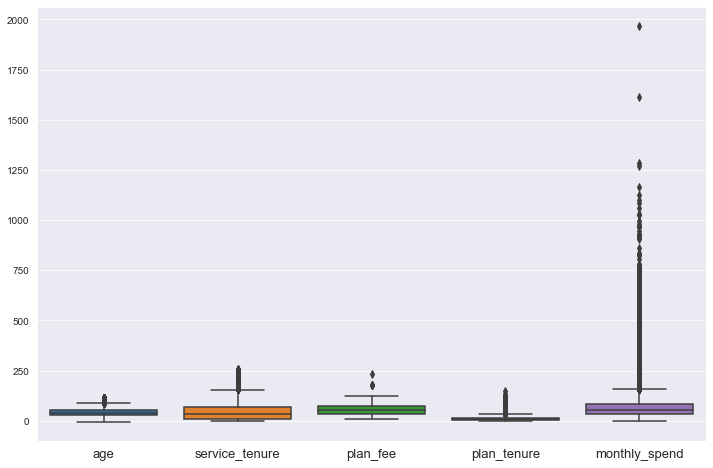

In [8]:
# show boxplot of all columns where outliers seem likely
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

outlier_columns = churn[["age", "service_tenure", "plan_fee", "plan_tenure", "monthly_spend"]].copy()

sns.boxplot(data=outlier_columns)
plt.xticks(fontsize=13);

Especially monthly spend needs to be analyse. However, due to the different scale of the features, an analysis will be done for each variable separately.

### Age

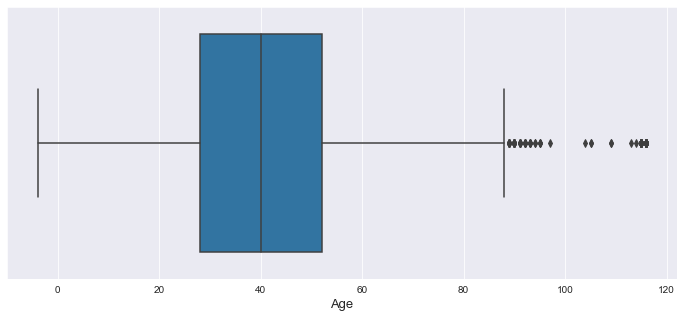

In [9]:
# analyse age with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="age", data=churn)
plt.xlabel("Age", fontsize=13);

In [10]:
# find cut off value for outlier and show all records that are outside
def upper_limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    return upper_limit

age_upper_limit = upper_limit(churn["age"])

age_out = churn[churn["age"] > age_upper_limit]
age_out

acc_tenure  num_services    age        acc_type  service_tenure  \
INDEX                                                                    
524            20             2   89.0        CONSUMER              20   
745            47             2  116.0  SMALL BUSINESS              11   
1491           42             1   91.0        CONSUMER              42   
2098           40             2   95.0        CONSUMER               5   
3118           76             4  115.0  SMALL BUSINESS              50   
...           ...           ...    ...             ...             ...   
43566          25             2  116.0  SMALL BUSINESS              25   
44292          97             1   91.0        CONSUMER             182   
44607          37             3  116.0  SMALL BUSINESS              14   
44673          79             1   90.0        CONSUMER              63   
44890          92             4  109.0  SMALL BUSINESS             115   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
524       31.81    NON BYO           20                 4                 24   
745       27.27        BYO           11                 0                 24   
1491      31.81    NON BYO           12                12                 24   
2098      27.27        BYO            5                 0                  0   
3118      54.54    NON BYO            3                 0                 24   
...         ...        ...          ...               ...                ...   
43566     90.90    NON BYO            5                11                 24   
44292      8.18    NON BYO            6                 0                  0   
44607     31.81    NON BYO           14                10                 24   
44673      8.18    NON BYO            7                 0                 12   
44890     40.90        BYO            7                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
524       ON-CONTRACT                      24  SAMSUNG          1   
745      OFF-CONTRACT                      24  UNKNOWN          1   
1491      ON-CONTRACT                      24    OTHER          1   
2098      NO-CONTRACT                       0   GOOGLE          1   
3118     OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
43566     ON-CONTRACT                      24  SAMSUNG          1   
44292     NO-CONTRACT                       0  SAMSUNG          0   
44607     ON-CONTRACT                       0    APPLE          0   
44673    OFF-CONTRACT                      12  SAMSUNG          0   
44890    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
524           152.72  COUNTRY   VIC  
745            53.06    METRO    WA  
1491           31.81  COUNTRY   NSW  
2098           27.27  COUNTRY   QLD  
3118           99.99    METRO    SA  
...              ...      ...   ...  
43566         351.02    METRO   QLD  
44292           8.18    METRO   VIC  
44607          31.81    METRO   NSW  
44673          12.72    METRO   VIC  
44890          44.95    METRO   VIC  

[105 rows x 17 columns]

Since the outliers represent only a tiny fraction of the data they will be removed.

In [11]:
#create a master df and remove

churn_master = churn.copy()

churn_master = churn[churn["age"] < age_upper_limit]
churn_master[churn_master["age"] > age_upper_limit]

Empty DataFrame
Columns: [acc_tenure, num_services, age, acc_type, service_tenure, plan_fee, byo_status, plan_tenure, months_remaining, fix_last_duration, contract_status, prev_contract_duration, brand, churn_ind, monthly_spend, region, state]
Index: []

### Plan Fee

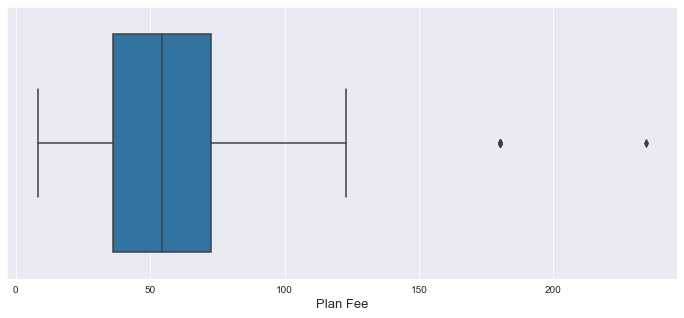

In [12]:
# analyse plan fee with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="plan_fee", data=churn)
plt.xlabel("Plan Fee", fontsize=13);

In [13]:
# check values that are larger than the upper limit
churn.query("plan_fee > 150")

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
1113           92             3  52.0  SMALL BUSINESS             230   
3868           56             1  31.0  SMALL BUSINESS              56   
13123          59             1  77.0  SMALL BUSINESS              59   
20953          57             1  31.0  SMALL BUSINESS              57   
24474          83             2  33.0  SMALL BUSINESS              83   
38047          84             1  53.0  SMALL BUSINESS              60   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
1113     180.00    NON BYO           60                 0                 24   
3868     180.00    NON BYO           56                 0                 24   
13123    180.00    NON BYO           59                 0                 24   
20953    234.54    NON BYO           57                 4                 24   
24474    180.00    NON BYO           56                 0                 24   
38047    180.00    NON BYO           60                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1113     OFF-CONTRACT                      24  SAMSUNG          1   
3868     OFF-CONTRACT                      24  SAMSUNG          1   
13123    OFF-CONTRACT                      24    APPLE          1   
20953     ON-CONTRACT                      24  SAMSUNG          0   
24474    OFF-CONTRACT                      24    APPLE          0   
38047    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
1113          102.72  COUNTRY   VIC  
3868          303.64    METRO    SA  
13123         102.72    METRO   NSW  
20953         117.27    METRO   VIC  
24474         102.72    METRO   VIC  
38047          90.00  COUNTRY   NSW

Since the outliers represent only a tiny fraction of the data they will be removed.

In [14]:
churn_master = churn[churn["plan_fee"] < 150]
churn_master[churn_master["plan_fee"] > 150]

Empty DataFrame
Columns: [acc_tenure, num_services, age, acc_type, service_tenure, plan_fee, byo_status, plan_tenure, months_remaining, fix_last_duration, contract_status, prev_contract_duration, brand, churn_ind, monthly_spend, region, state]
Index: []

### Service Tenure

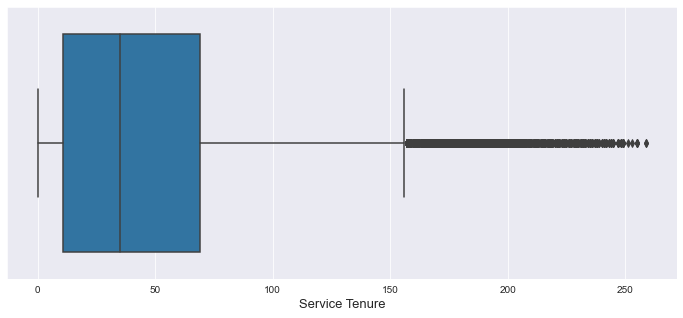

In [15]:
# analyse service tenure with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="service_tenure", data=churn)
plt.xlabel("Service Tenure", fontsize=13);

In [16]:
# check values that are larger than the upper limit

service_tenure_limit = upper_limit(churn["service_tenure"])

churn[churn["service_tenure"] > service_tenure_limit]

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
38             96             1  61.0        CONSUMER             234   
51             94             1  33.0        CONSUMER             185   
58             95             2  50.0        CONSUMER             232   
72             69             1  60.0        CONSUMER             191   
105            93             1  58.0        CONSUMER             163   
...           ...           ...   ...             ...             ...   
46138          92             3  56.0        CONSUMER             175   
46165          94             1  44.0  SMALL BUSINESS             211   
46178          92             1  43.0  SMALL BUSINESS             216   
46198          93             1  88.0        CONSUMER             160   
46205          94             1  40.0        CONSUMER             182   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
38        27.27        BYO            0                 0                 24   
51        54.54    NON BYO           30                 0                 24   
58        36.36        BYO            1                 0                 12   
72        31.81    NON BYO           17                 7                 24   
105        8.18    NON BYO            6                 0                  0   
...         ...        ...          ...               ...                ...   
46138     45.44    NON BYO           28                 0                 24   
46165     54.54    NON BYO           13                 0                 24   
46178     40.90        BYO           16                 0                 24   
46198     17.27    NON BYO            3                 0                  0   
46205     17.27    NON BYO            4                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
38       OFF-CONTRACT                      24   GOOGLE          1   
51       OFF-CONTRACT                      24    APPLE          1   
58       OFF-CONTRACT                      12    APPLE          1   
72        ON-CONTRACT                      24   GOOGLE          1   
105       NO-CONTRACT                       0  SAMSUNG          1   
...               ...                     ...      ...        ...   
46138    OFF-CONTRACT                      24    APPLE          0   
46165    OFF-CONTRACT                      24    APPLE          1   
46178    OFF-CONTRACT                      24    APPLE          0   
46198     NO-CONTRACT                       0   GOOGLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
38             27.27    METRO   VIC  
51             54.54    METRO   NSW  
58             10.07  COUNTRY   QLD  
72             31.81  COUNTRY   NSW  
105             8.18  COUNTRY   NSW  
...              ...      ...   ...  
46138          45.44    METRO   VIC  
46165          76.35  COUNTRY   VIC  
46178          81.35    METRO    WA  
46198          17.27  COUNTRY   NSW  
46205          17.27    METRO   VIC  

[3274 rows x 17 columns]

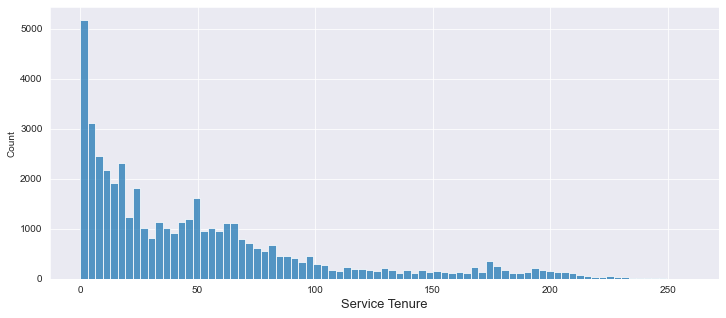

In [17]:
# check skewness
plt.figure(figsize=(12,5))


sns.histplot(x="service_tenure", data=churn)
plt.xlabel("Service Tenure", fontsize=13);

In [18]:
service_tenure_limit

156.0

In [19]:
# check amount of consumers in outliers
churn.query("service_tenure > 156 & acc_type == 'CONSUMER'")

acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
38             96             1  61.0  CONSUMER             234     27.27   
51             94             1  33.0  CONSUMER             185     54.54   
58             95             2  50.0  CONSUMER             232     36.36   
72             69             1  60.0  CONSUMER             191     31.81   
105            93             1  58.0  CONSUMER             163      8.18   
...           ...           ...   ...       ...             ...       ...   
46088          94             2  85.0  CONSUMER             208     17.27   
46128          93             3  62.0  CONSUMER             219     45.44   
46138          92             3  56.0  CONSUMER             175     45.44   
46198          93             1  88.0  CONSUMER             160     17.27   
46205          94             1  40.0  CONSUMER             182     17.27   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
38           BYO            0                 0                 24   
51       NON BYO           30                 0                 24   
58           BYO            1                 0                 12   
72       NON BYO           17                 7                 24   
105      NON BYO            6                 0                  0   
...          ...          ...               ...                ...   
46088    NON BYO            2                 0                 24   
46128    NON BYO           20                 4                 24   
46138    NON BYO           28                 0                 24   
46198    NON BYO            3                 0                  0   
46205    NON BYO            4                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
38       OFF-CONTRACT                      24   GOOGLE          1   
51       OFF-CONTRACT                      24    APPLE          1   
58       OFF-CONTRACT                      12    APPLE          1   
72        ON-CONTRACT                      24   GOOGLE          1   
105       NO-CONTRACT                       0  SAMSUNG          1   
...               ...                     ...      ...        ...   
46088    OFF-CONTRACT                      24   GOOGLE          1   
46128     ON-CONTRACT                      24    APPLE          0   
46138    OFF-CONTRACT                      24    APPLE          0   
46198     NO-CONTRACT                       0   GOOGLE          0   
46205    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
38             27.27    METRO   VIC  
51             54.54    METRO   NSW  
58             10.07  COUNTRY   QLD  
72             31.81  COUNTRY   NSW  
105             8.18  COUNTRY   NSW  
...              ...      ...   ...  
46088          17.27    METRO   NSW  
46128         170.66    METRO    WA  
46138          45.44    METRO   VIC  
46198          17.27  COUNTRY   NSW  
46205          17.27    METRO   VIC  

[2432 rows x 17 columns]

In [20]:
#show mean value
churn.query("service_tenure > 156 & acc_type == 'CONSUMER'")["service_tenure"].mean()

187.98190789473685

In [21]:
# check amount of businesses in outliers
churn.query("service_tenure > 156 & acc_type == 'SMALL BUSINESS'")

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
126            92             4  55.0  SMALL BUSINESS             198   
153            71             1  72.0  SMALL BUSINESS             197   
207            93             3  48.0  SMALL BUSINESS             219   
355            94             1  57.0  SMALL BUSINESS             175   
372            95             2  16.0  SMALL BUSINESS             166   
...           ...           ...   ...             ...             ...   
46077          95             1  44.0  SMALL BUSINESS             176   
46096          91             2  37.0  SMALL BUSINESS             202   
46124          93             1  54.0  SMALL BUSINESS             200   
46165          94             1  44.0  SMALL BUSINESS             211   
46178          92             1  43.0  SMALL BUSINESS             216   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
126       45.44    NON BYO           24                 0                 24   
153       17.27    NON BYO            3                 0                  0   
207       40.90        BYO           19                 0                 24   
355       90.00    NON BYO           51                 0                 24   
372       72.72    NON BYO           13                 0                 24   
...         ...        ...          ...               ...                ...   
46077     54.54    NON BYO           29                 0                 24   
46096     45.45    NON BYO            1                 0                 24   
46124     53.63    NON BYO           57                 0                 24   
46165     54.54    NON BYO           13                 0                 24   
46178     40.90        BYO           16                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
126      OFF-CONTRACT                      24    APPLE          1   
153       NO-CONTRACT                       0  SAMSUNG          1   
207      OFF-CONTRACT                      24    APPLE          1   
355      OFF-CONTRACT                      24    APPLE          1   
372      OFF-CONTRACT                      24  SAMSUNG          1   
...               ...                     ...      ...        ...   
46077    OFF-CONTRACT                      24    APPLE          0   
46096    OFF-CONTRACT                      24    APPLE          0   
46124    OFF-CONTRACT                      24  SAMSUNG          1   
46165    OFF-CONTRACT                      24    APPLE          1   
46178    OFF-CONTRACT                      24    APPLE          0   

       monthly_spend   region state  
INDEX                                
126            81.79    METRO   ACT  
153            17.27    METRO   VIC  
207            40.90    METRO   VIC  
355            90.00    METRO   VIC  
372            85.44    METRO   VIC  
...              ...      ...   ...  
46077          74.22    METRO    WA  
46096          33.23  COUNTRY   NSW  
46124         210.50    METRO   VIC  
46165          76.35  COUNTRY   VIC  
46178          81.35    METRO    WA  

[842 rows x 17 columns]

In [22]:
# show mean value
churn.query("service_tenure > 156 & acc_type == 'SMALL BUSINESS'")["service_tenure"].mean()

191.45961995249405

In [79]:
# show mean value of age for high tenure
churn[churn["service_tenure"] > service_tenure_limit]["age"].mean()

52.72052535125229

Since the data is highly skewed to the right, a logarithmic transformation seems useful. There are so many values above the upper limit that they cannot be treated as outliers as they represent sufficient information. However, domain expertise would be required at this point to make an informed decision. To achieve a higher data quality, extremely high values will be disregarded if they account for a small fraction of the whole data. But as can be seen, the mean age value of this high service tenure group is 12 years higher than of the whole set of data. This implies that there is a relationship between age and service tenure i.e. this information is required for modeling.

In [78]:
churn[churn["service_tenure"] > 250]

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
9695           93             2  39.0        CONSUMER             255   
15710          94             1  63.0  SMALL BUSINESS             255   
25523          93             3  75.0  SMALL BUSINESS             259   
28693          71             2  76.0        CONSUMER             259   
29051          90             4  55.0        CONSUMER             253   
30906          98             1  38.0        CONSUMER             255   
30923          94             2  66.0        CONSUMER             251   
40531          68             1  70.0        CONSUMER             255   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
9695      31.81    NON BYO           11                13                 24   
15710     27.27        BYO            0                 0                 24   
25523     72.72    NON BYO            8                16                 24   
28693     45.45    NON BYO           37                 0                 24   
29051     54.54    NON BYO           14                10                 24   
30906     72.72    NON BYO            5                19                 24   
30923     54.54    NON BYO            3                21                 24   
40531     31.81    NON BYO           14                10                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
9695      ON-CONTRACT                      24    APPLE          0   
15710    OFF-CONTRACT                      24    APPLE          0   
25523     ON-CONTRACT                      12    APPLE          0   
28693    OFF-CONTRACT                      24    APPLE          0   
29051     ON-CONTRACT                      24   GOOGLE          0   
30906     ON-CONTRACT                      24    APPLE          0   
30923     ON-CONTRACT                      24    APPLE          0   
40531     ON-CONTRACT                      24  SAMSUNG          0   

       monthly_spend region state  
INDEX                              
9695           40.90  METRO   NSW  
15710          27.27  METRO   NSW  
25523          75.43  METRO   NSW  
28693          58.17  METRO   QLD  
29051          62.71  METRO   NSW  
30906          84.53  METRO   QLD  
30923          54.54  METRO   NSW  
40531          22.71  METRO   NSW

In [80]:
# remove high values
churn_master = churn[churn["service_tenure"] < 250]
churn_master[churn_master["service_tenure"] > 250]

Empty DataFrame
Columns: [acc_tenure, num_services, age, acc_type, service_tenure, plan_fee, byo_status, plan_tenure, months_remaining, fix_last_duration, contract_status, prev_contract_duration, brand, churn_ind, monthly_spend, region, state]
Index: []

In [144]:
# create column and calculate log
churn_master["log_service_tenure"] = np.log(churn_master.loc[:, "service_tenure"])

/Users/felixrosenbergernew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/56050063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["log_service_tenure"] = np.log(churn_master.loc[:, "service_tenure"])


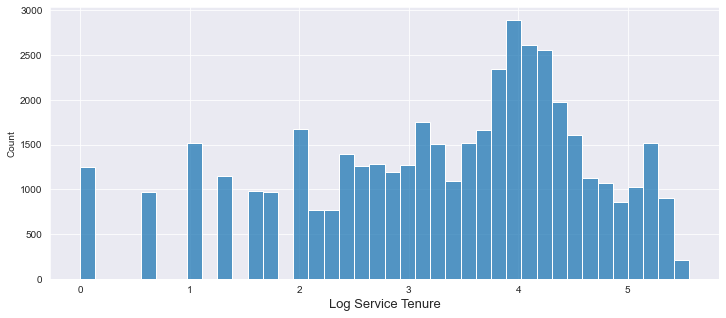

In [145]:
# show feature after transformation
plt.figure(figsize=(12,5))


sns.histplot(x="log_service_tenure", data=churn_master, bins=40)
plt.xlabel("Log Service Tenure", fontsize=13); 

The variable seems to be more sufficient for a later model even though it seems to be multi-modal rather than normally distributed. However, to have more options later on, another version will be created as standardised. In the model building phase it will be evaluated which version is a better fit.

In [88]:
# create standardised variable
data = churn_master["service_tenure"]

scaler = StandardScaler()

churn_master["norm_service_tenure"] = scaler.fit_transform(data.values.reshape(-1, 1))
churn_master.head()

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/3369942853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["norm_service_tenure"] = scaler.fit_transform(data.values.reshape(-1, 1))


acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   

       monthly_spend   region state  log_service_tenure  norm_service_tenure  
INDEX                                                                         
1              61.40  COUNTRY    WA            3.828641            -0.082591  
2              54.54    METRO   NSW            4.077537             0.168087  
3               2.50  COUNTRY    WA            4.174387             0.283784  
4               6.48  COUNTRY   VIC            3.433987            -0.371835  
5             100.22    METRO   NSW            4.553877             0.862272

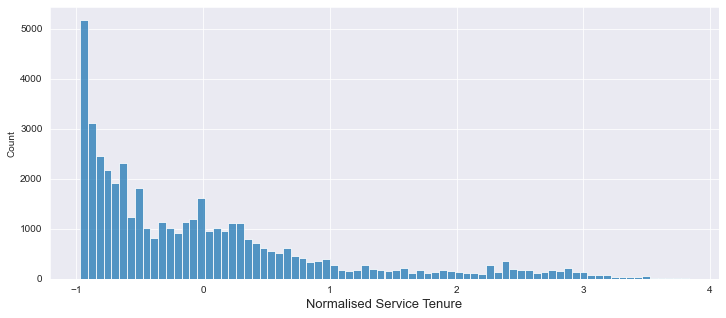

In [89]:
# visually check normalised feature
plt.figure(figsize=(12,5))


sns.histplot(x="norm_service_tenure", data=churn_master)
plt.xlabel("Normalised Service Tenure", fontsize=13); 

### Plan Tenure

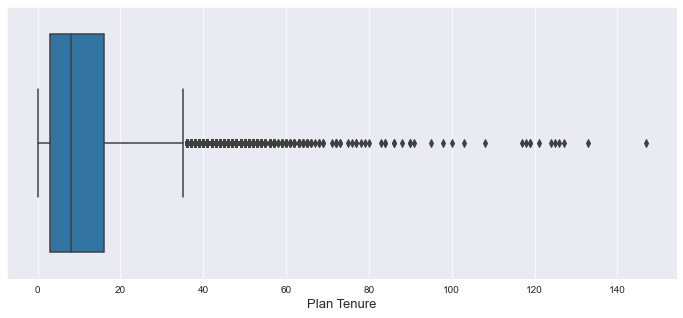

In [30]:
# analyse plan tenure with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="plan_tenure", data=churn)
plt.xlabel("Plan Tenure", fontsize=13);

In [31]:
# check values that are larger than the upper limit
def upper_limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    return upper_limit

plan_tenure_limit = upper_limit(churn["plan_tenure"])

churn[churn["plan_tenure"] > plan_tenure_limit]

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
7              90             1  35.0        CONSUMER              90   
24             62             1  34.0        CONSUMER              62   
40             78             1  27.0  SMALL BUSINESS              78   
46             83             2  26.0        CONSUMER              64   
95             47             1  22.0        CONSUMER              47   
...           ...           ...   ...             ...             ...   
45994          90             2  50.0  SMALL BUSINESS              90   
46017          75             2  41.0  SMALL BUSINESS              75   
46106          62             2  28.0        CONSUMER              62   
46124          93             1  54.0  SMALL BUSINESS             200   
46135          40             1  22.0        CONSUMER              40   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
7         71.81    NON BYO           63                 0                 24   
24        80.90    NON BYO           46                 0                 24   
40        53.63    NON BYO           54                 0                 24   
46        44.54        BYO           53                 0                 12   
95        90.00    NON BYO           47                 0                 24   
...         ...        ...          ...               ...                ...   
45994     45.45    NON BYO           40                 4                 24   
46017     53.63    NON BYO           51                 0                 24   
46106     54.54    NON BYO           39                 0                 24   
46124     53.63    NON BYO           57                 0                 24   
46135     30.90        BYO           40                 0                 12   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
7        OFF-CONTRACT                      24    APPLE          1   
24       OFF-CONTRACT                      24    APPLE          1   
40       OFF-CONTRACT                      24    APPLE          1   
46       OFF-CONTRACT                      12    APPLE          1   
95       OFF-CONTRACT                      24   HUAWEI          1   
...               ...                     ...      ...        ...   
45994     ON-CONTRACT                      24  SAMSUNG          0   
46017    OFF-CONTRACT                      24  SAMSUNG          1   
46106    OFF-CONTRACT                      24    APPLE          0   
46124    OFF-CONTRACT                      24  SAMSUNG          1   
46135    OFF-CONTRACT                      12    APPLE          0   

       monthly_spend   region state  
INDEX                                
7              71.81    METRO   NSW  
24            102.07    METRO   VIC  
40              3.42    METRO   NSW  
46             59.98    METRO   NSW  
95             90.00  COUNTRY    WA  
...              ...      ...   ...  
45994          45.95    METRO   NSW  
46017          53.63    METRO   NSW  
46106         134.61  COUNTRY   NSW  
46124         210.50    METRO   VIC  
46135          30.90    METRO   QLD  

[1112 rows x 17 columns]

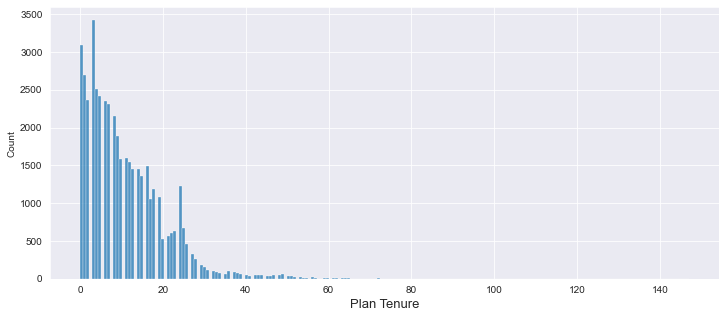

In [32]:
# plot histogram
plt.figure(figsize=(12,5))


sns.histplot(x="plan_tenure", data=churn)
plt.xlabel("Plan Tenure", fontsize=13);

In [90]:
#check mean value
churn[churn["plan_tenure"] > plan_tenure_limit]["age"].mean()

45.82104316546763

Since the data is highly skewed to the right, a logarithmic transformation seems useful. There are so many values above the upper limit that they cannot be treated as outliers as they represent sufficient information. However, domain expertise would be required at this point to make an informed decision. To achieve a higher data quality, extremely high values will be disregarded if they account for a small fraction of the whole data. Additionally, a log version and a standardised version will be created.

In [91]:
churn[churn["plan_tenure"] > 60]

acc_tenure  num_services   age        acc_type  service_tenure  \
INDEX                                                                   
7              90             1  35.0        CONSUMER              90   
449            95             3  16.0  SMALL BUSINESS             200   
1106           67             2  51.0        CONSUMER             167   
2339           69             1  56.0        CONSUMER              69   
2822           95             1  49.0        CONSUMER              72   
...           ...           ...   ...             ...             ...   
43452          64             1  67.0  SMALL BUSINESS             245   
44468          90             2  46.0  SMALL BUSINESS              95   
45230          92             1  49.0        CONSUMER             196   
45279          90             1  38.0        CONSUMER              90   
45382          93             3  63.0  SMALL BUSINESS             111   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
7         71.81    NON BYO           63                 0                 24   
449       44.54    NON BYO           98                 0                  0   
1106      35.45    NON BYO           67                 0                  0   
2339      44.54    NON BYO           69                 0                 24   
2822      44.54    NON BYO           72                 0                 24   
...         ...        ...          ...               ...                ...   
43452     26.36    NON BYO           65                 0                  0   
44468     44.54    NON BYO           64                 0                 24   
45230     44.54    NON BYO           63                 0                 24   
45279     44.54    NON BYO           90                 0                 24   
45382     26.36    NON BYO           75                 0                 12   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
7        OFF-CONTRACT                      24    APPLE          1   
449       NO-CONTRACT                       0    APPLE          1   
1106      NO-CONTRACT                       0   GOOGLE          1   
2339     OFF-CONTRACT                      24   GOOGLE          1   
2822     OFF-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
43452     NO-CONTRACT                       0   GOOGLE          0   
44468    OFF-CONTRACT                      24    APPLE          0   
45230    OFF-CONTRACT                      24  SAMSUNG          0   
45279    OFF-CONTRACT                      24    APPLE          1   
45382    OFF-CONTRACT                      12   GOOGLE          1   

       monthly_spend   region state  
INDEX                                
7              71.81    METRO   NSW  
449            38.10    METRO   VIC  
1106           40.48    METRO   VIC  
2339           49.08    METRO   NSW  
2822           89.93    METRO   VIC  
...              ...      ...   ...  
43452          27.07  COUNTRY   QLD  
44468          73.09    METRO   NSW  
45230         182.06    METRO   NSW  
45279          44.54  COUNTRY   VIC  
45382          26.36    METRO   VIC  

[86 rows x 17 columns]

In [93]:
# drop extreme values
churn_master = churn[churn["plan_tenure"] < 60]
churn_master[churn_master["plan_tenure"] > 60]

Empty DataFrame
Columns: [acc_tenure, num_services, age, acc_type, service_tenure, plan_fee, byo_status, plan_tenure, months_remaining, fix_last_duration, contract_status, prev_contract_duration, brand, churn_ind, monthly_spend, region, state]
Index: []

In [142]:
# create column and calculate log
churn_master["log_plan_tenure"] = np.log(churn_master.loc[:, "plan_tenure"])

/Users/felixrosenbergernew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/4269120388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["log_plan_tenure"] = np.log(churn_master.loc[:, "plan_tenure"])


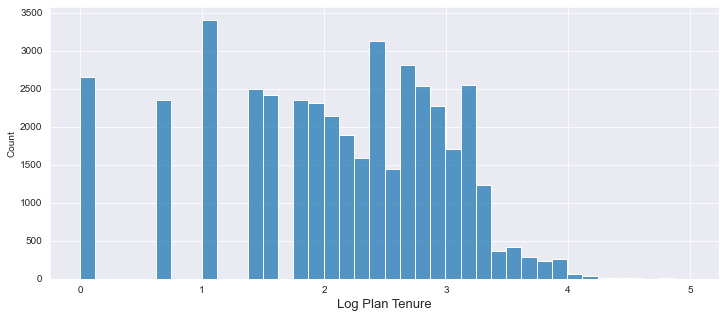

In [143]:
# show feature after transformation
plt.figure(figsize=(12,5))


sns.histplot(x="log_plan_tenure", data=churn_master, bins=40)
plt.xlabel("Log Plan Tenure", fontsize=13); 

Again, the variable is not normally distributed but the skew and range are reduced.

In [98]:
# create standardised variable
data = churn_master["plan_tenure"]

scaler = StandardScaler()

churn_master["norm_plan_tenure"] = scaler.fit_transform(data.values.reshape(-1, 1))
churn_master.head()

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/419564813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["norm_plan_tenure"] = scaler.fit_transform(data.values.reshape(-1, 1))


acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   

       monthly_spend   region state  log_plan_tenure  norm_plan_tenure  
INDEX                                                                   
1              61.40  COUNTRY    WA         2.708050          0.462723  
2              54.54    METRO   NSW         1.609438         -0.616307  
3               2.50  COUNTRY    WA         2.708050          0.462723  
4               6.48  COUNTRY   VIC         3.433987          2.189172  
5             100.22    METRO   NSW             -inf         -1.155822

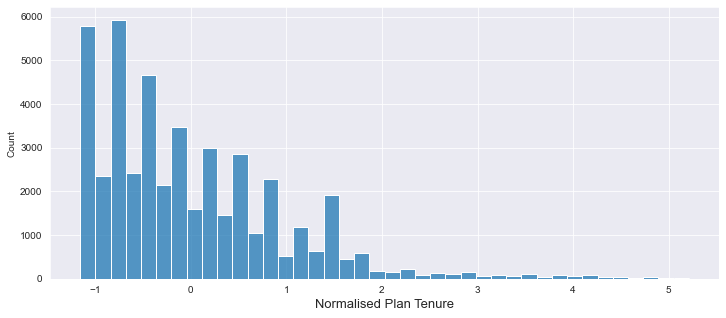

In [100]:
# visually check normalised feature
plt.figure(figsize=(12,5))


sns.histplot(x="norm_plan_tenure", data=churn_master, bins=40)
plt.xlabel("Normalised Plan Tenure", fontsize=13); 

### Monthly Spend

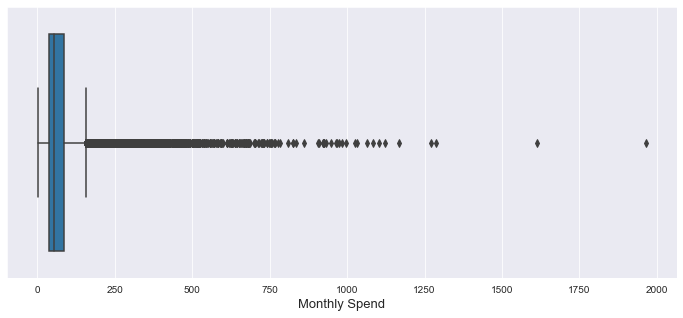

In [37]:
# analyse monthly spend with regard to outliers
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=churn)
plt.xlabel("Monthly Spend", fontsize=13);

In [45]:
# check values that are larger than the upper limit

monthly_spend_limit = upper_limit(churn["monthly_spend"])

monthly_spend_outliers = churn[churn["monthly_spend"] > monthly_spend_limit]
monthly_spend_outliers

acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
6              62             2  25.0  CONSUMER              62     90.90   
11              9             2  21.0  CONSUMER               9     72.72   
21             34             1  49.0  CONSUMER              34     54.54   
25              4             1  68.0  CONSUMER               3     36.36   
28             92             1  30.0  CONSUMER             106     72.72   
...           ...           ...   ...       ...             ...       ...   
46158           3             2  55.0  CONSUMER               3     54.54   
46166           5             3  68.0  CONSUMER               4     54.54   
46170           3             1  35.0  CONSUMER               3     36.36   
46176          75             1  41.0  CONSUMER              75     54.54   
46183           9             1  36.0  CONSUMER               9     90.90   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
6        NON BYO            8                13                 24   
11       NON BYO            9                15                 24   
21       NON BYO           13                11                 24   
25       NON BYO            3                21                 24   
28       NON BYO           12                12                 24   
...          ...          ...               ...                ...   
46158    NON BYO            3                21                 24   
46166    NON BYO            4                20                 24   
46170    NON BYO            3                21                 24   
46176    NON BYO           21                 3                 24   
46183    NON BYO            9                15                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
6         ON-CONTRACT                      24    APPLE          1   
11        ON-CONTRACT                       0    APPLE          1   
21        ON-CONTRACT                      24  SAMSUNG          1   
25        ON-CONTRACT                      24  UNKNOWN          1   
28        ON-CONTRACT                      24    APPLE          1   
...               ...                     ...      ...        ...   
46158     ON-CONTRACT                       0  UNKNOWN          1   
46166     ON-CONTRACT                       0    APPLE          1   
46170     ON-CONTRACT                       0  UNKNOWN          1   
46176     ON-CONTRACT                      24  SAMSUNG          1   
46183     ON-CONTRACT                       0    APPLE          1   

       monthly_spend   region state  
INDEX                                
6             250.46  COUNTRY   VIC  
11            194.29  COUNTRY   NSW  
21            302.41    METRO   VIC  
25            206.41    METRO   VIC  
28            481.33    METRO   NSW  
...              ...      ...   ...  
46158         354.91    METRO   NSW  
46166         279.89  COUNTRY   VIC  
46170         207.58    METRO   VIC  
46176         244.91  COUNTRY   QLD  
46183         270.74  COUNTRY    WA  

[3666 rows x 17 columns]

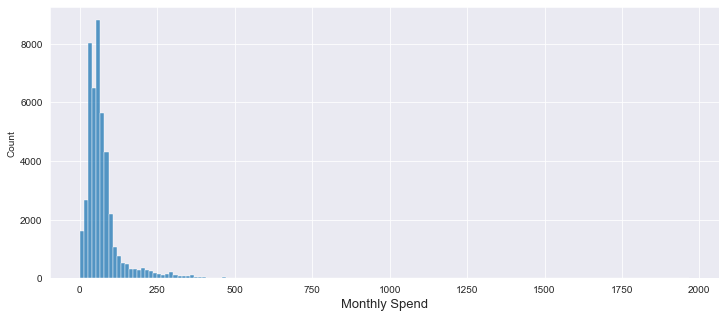

In [73]:
# show histogram
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=churn, bins=150)
plt.xlabel("Monthly Spend", fontsize=13);

After some research, it is clear that:
- regular mobile plans do not cost more than AUD120
- family plans are around AUD150

However, since the amount of outliers is so significant, they must be handled in some way. At this stage it is impossible to know the reason why there are so many high values and domain expertise would be required for further evaluation. Thus, only extremely high values that are greater than 750 will be considered as outliers.

In [117]:
monthly_spend_outliers = churn[churn["monthly_spend"] > 500]
print(len(monthly_spend_outliers))

158


These 500 extreme values will be removed as they only represent a tiny fraction of the data.

In [118]:
churn_master = churn[churn["monthly_spend"] < 500]
churn_master[churn_master["monthly_spend"] > 500]

Empty DataFrame
Columns: [acc_tenure, num_services, age, acc_type, service_tenure, plan_fee, byo_status, plan_tenure, months_remaining, fix_last_duration, contract_status, prev_contract_duration, brand, churn_ind, monthly_spend, region, state]
Index: []

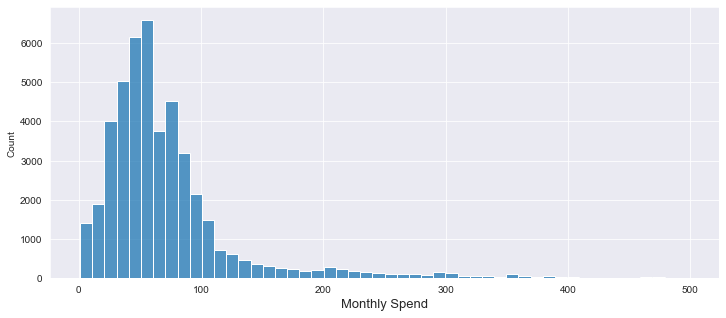

In [120]:
# show histogram
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=churn_master, bins=50)
plt.xlabel("Monthly Spend", fontsize=13);

In the following it will be checked how monthly spend is distributed for different groups within the data. Depending on the outcome, outlier consideration might change.

In [105]:
# show value of upper limit
print(monthly_spend_limit)

156.785


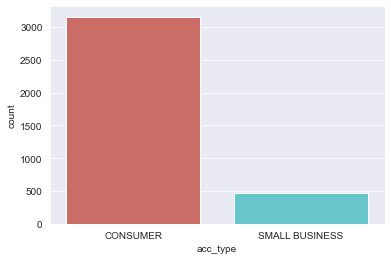

In [107]:
# check if there are different groups in the outlier section
sns.countplot(x="acc_type", data=churn_master[churn_master["monthly_spend"] > monthly_spend_limit], palette='hls');

In [114]:
# check monthly spend distribution for consumers
consumers_spend = churn.query("acc_type == 'CONSUMER'")
consumers_spend["monthly_spend"].describe()

count    39087.000000
mean        75.286930
std         73.913483
min          1.020000
25%         36.360000
50%         54.540000
75%         84.530000
max       1965.890000
Name: monthly_spend, dtype: float64

Since the vast majority (39087 out of around 46000 records) of data belongs to the Consumer group, it makes sense that that most of these are also represented in the outlier section. For a sense check their distribution will be visualised below.

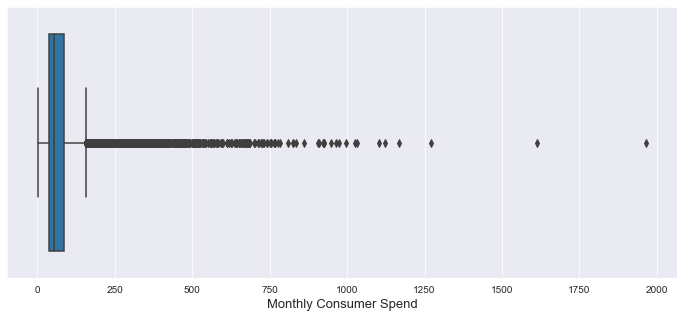

In [115]:
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=consumers_spend)
plt.xlabel("Monthly Consumer Spend", fontsize=13);

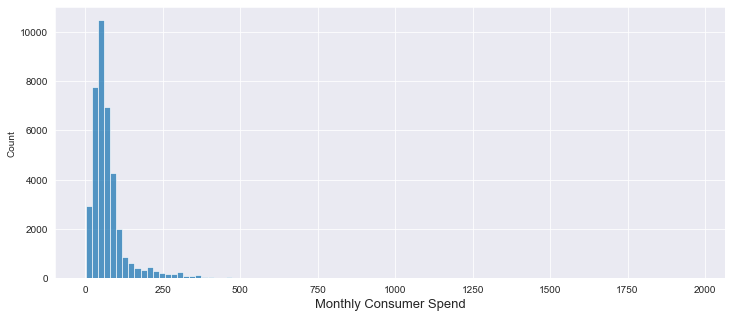

In [116]:
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=consumers_spend, bins=100)
plt.xlabel("Monthly Consumer Spend", fontsize=13);

In [122]:
# check monthly spend distribution for businesses
business_spend = churn.query("acc_type == 'SMALL BUSINESS'")
business_spend["monthly_spend"].describe()

count    7119.000000
mean       74.645009
std        71.317111
min         1.080000
25%        40.900000
50%        55.940000
75%        84.530000
max      1286.570000
Name: monthly_spend, dtype: float64

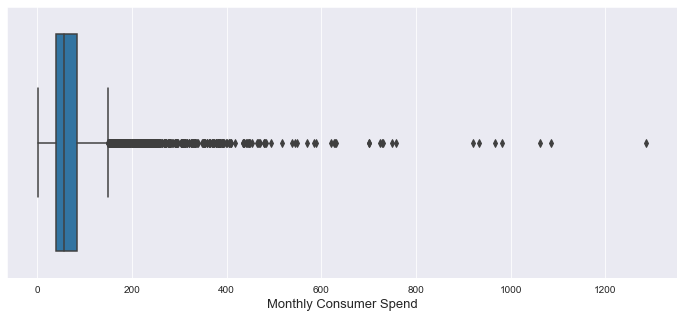

In [123]:
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=business_spend)
plt.xlabel("Monthly Business Spend", fontsize=13);

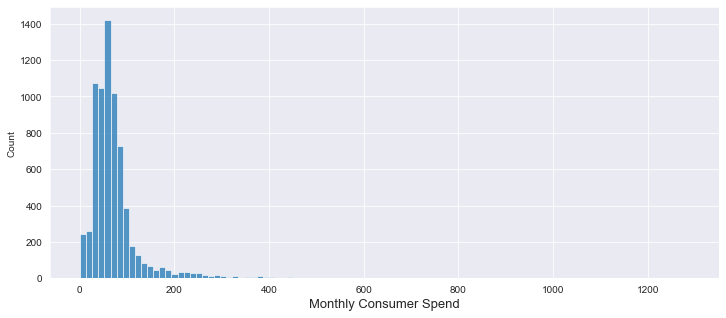

In [124]:
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=business_spend, bins=100)
plt.xlabel("Monthly Business Spend", fontsize=13);

From the above analysis it can be seen that the distribution of the two groups regarding monthly spending is not different. The same analysis will be done with regard to BYO.

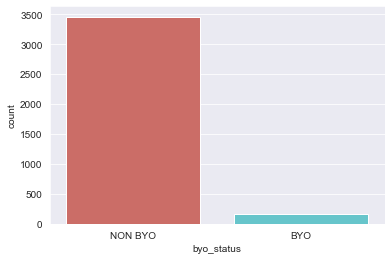

In [108]:
sns.countplot(x="byo_status", data=churn_master[churn_master["monthly_spend"] > monthly_spend_limit], palette='hls');

In [128]:
# check monthly spend distribution for non byo
non_byo_spend = churn.query("byo_status == 'NON BYO'")
non_byo_spend["monthly_spend"].describe()

count    35475.000000
mean        84.739818
std         77.434066
min          1.020000
25%         45.450000
50%         66.350000
75%         90.900000
max       1613.610000
Name: monthly_spend, dtype: float64

Since the vast majority (35475 out of around 46000 records) of data belongs to the non BYO group, it makes sense that that most of these are also represented in the outlier section. For a sense check their distribution will be visualised below.

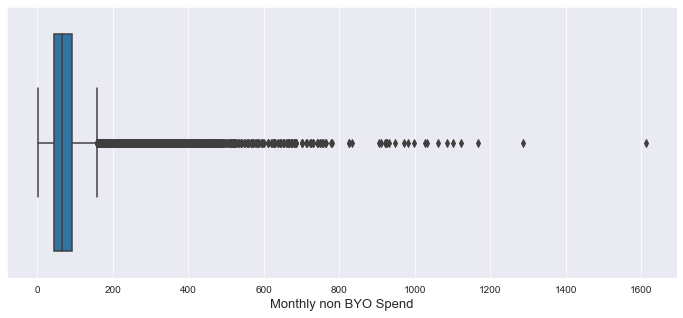

In [132]:
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=non_byo_spend)
plt.xlabel("Monthly non BYO Spend", fontsize=13);

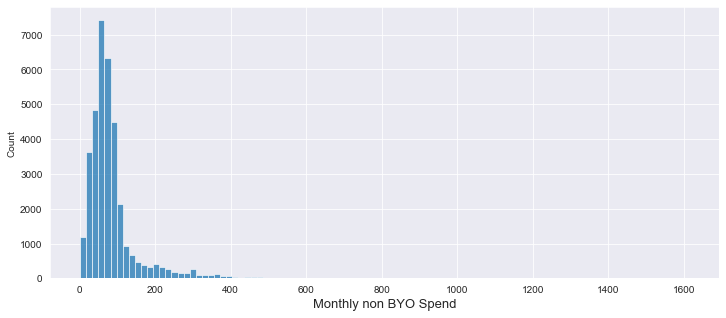

In [133]:
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=non_byo_spend, bins=100)
plt.xlabel("Monthly non BYO Spend", fontsize=13);

In [134]:
# check monthly spend distribution for byo
byo_spend = churn.query("byo_status == 'BYO'")
byo_spend["monthly_spend"].describe()

count    10731.000000
mean        43.611313
std         46.399332
min          1.020000
25%         27.270000
50%         36.360000
75%         45.950000
max       1965.890000
Name: monthly_spend, dtype: float64

Note that it can already be seen that the mean is only approximately half than for non byo customers. This is in line with expectations since these customers do not need to pay for their phone in addition to their plan.

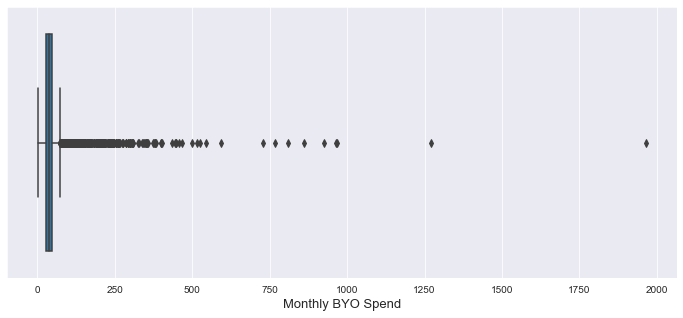

In [135]:
plt.figure(figsize=(12,5))


sns.boxplot(x="monthly_spend", data=byo_spend)
plt.xlabel("Monthly BYO Spend", fontsize=13);

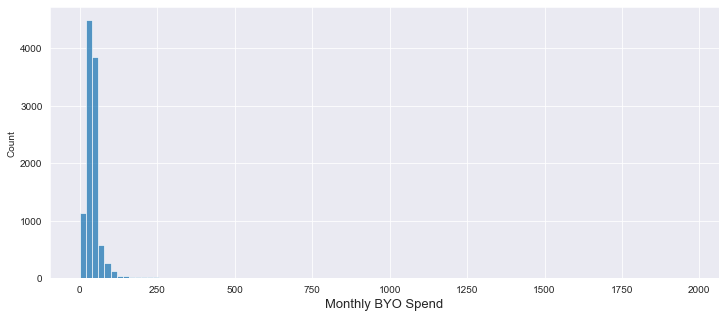

In [136]:
plt.figure(figsize=(12,5))


sns.histplot(x="monthly_spend", data=byo_spend, bins=100)
plt.xlabel("Monthly BYO Spend", fontsize=13);

Overall, the initial cut off value for too extreme values seems to make sense. In the following the feature will be transformed logarithmically and will be standardised as options for later model building.

In [146]:
# create column and calculate log
churn_master["log_monthly_spend"] = np.log(churn_master.loc[:, "monthly_spend"])

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/3583860829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["log_monthly_spend"] = np.log(churn_master.loc[:, "monthly_spend"])


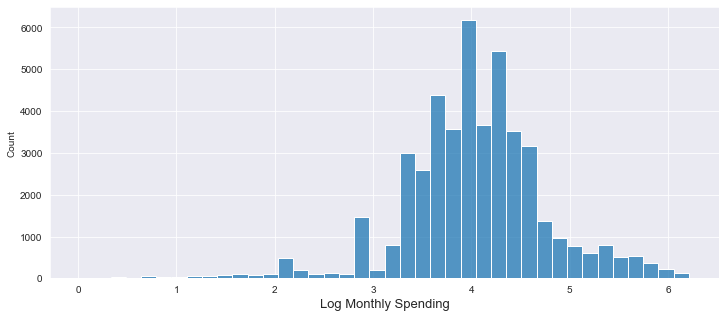

In [147]:
# show feature after transformation
plt.figure(figsize=(12,5))


sns.histplot(x="log_monthly_spend", data=churn_master, bins=40)
plt.xlabel("Log Monthly Spending", fontsize=13); 

This transformation leads to a approximately normal distribution.

In [150]:
# create standardised variable
data = churn_master["monthly_spend"]

scaler = StandardScaler()

churn_master["norm_monthly_spend"] = scaler.fit_transform(data.values.reshape(-1, 1))
churn_master.head()

/var/folders/31/2xxsfpps75923jkzs3xks1w00000gq/T/ipykernel_31936/993583931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_master["norm_monthly_spend"] = scaler.fit_transform(data.values.reshape(-1, 1))


acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   

      byo_status  plan_tenure  months_remaining  fix_last_duration  ...  \
INDEX                                                               ...   
1        NON BYO           15                 0                 24  ...   
2        NON BYO            5                 0                 24  ...   
3            BYO           15                 0                 12  ...   
4        NON BYO           31                 0                 24  ...   
5        NON BYO            0                 0                 24  ...   

      prev_contract_duration    brand churn_ind  monthly_spend   region state  \
INDEX                                                                           
1                         24  SAMSUNG         1          61.40  COUNTRY    WA   
2                         24    APPLE         1          54.54    METRO   NSW   
3                         12    APPLE         1           2.50  COUNTRY    WA   
4                         24    APPLE         1           6.48  COUNTRY   VIC   
5                         24    APPLE         1         100.22    METRO   NSW   

      log_monthly_spend  log_plan_tenure  log_service_tenure  \
INDEX                                                          
1              4.117410         2.708050            3.828641   
2              3.998934         1.609438            4.077537   
3              0.916291         2.708050            4.174387   
4              1.868721         3.433987            3.433987   
5              4.607368             -inf            4.553877   

       norm_monthly_spend  
INDEX                      
1               -0.185422  
2               -0.294470  
3               -1.121708  
4               -1.058441  
5                0.431668  

[5 rows x 21 columns]

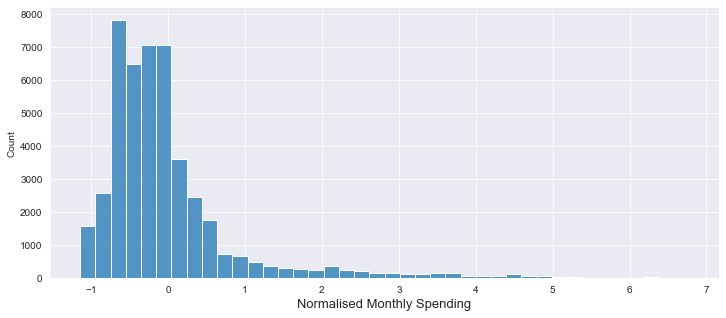

In [151]:
# visually check normalised feature
plt.figure(figsize=(12,5))


sns.histplot(x="norm_monthly_spend", data=churn_master, bins=40)
plt.xlabel("Normalised Monthly Spending", fontsize=13); 

## Missing Values Analysis

In [58]:
# analyse missing values
churn.isnull().sum()

acc_tenure                 0
num_services               0
age                       76
acc_type                   0
service_tenure             0
plan_fee                   0
byo_status                 0
plan_tenure                0
months_remaining           0
fix_last_duration          0
contract_status            0
prev_contract_duration     0
brand                      0
churn_ind                  0
monthly_spend              0
region                     1
state                      1
dtype: int64

In [59]:
churn[churn.isnull().any(axis=1)]

acc_tenure  num_services  age        acc_type  service_tenure  \
INDEX                                                                  
186            94             2  NaN  SMALL BUSINESS              94   
213            39             4  NaN  SMALL BUSINESS               1   
2047            4             2  NaN  SMALL BUSINESS               4   
2560            8             4  NaN  SMALL BUSINESS               8   
4129            9             3  NaN  SMALL BUSINESS               9   
...           ...           ...  ...             ...             ...   
41919           7             3  NaN  SMALL BUSINESS               5   
42252          94             2  NaN  SMALL BUSINESS              16   
44004           0             1  NaN  SMALL BUSINESS               0   
44466          16             1  NaN  SMALL BUSINESS              16   
44660          39             4  NaN  SMALL BUSINESS               1   

       plan_fee byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                          
186       45.44    NON BYO           27                 0                 24   
213       36.36    NON BYO            1                 0                  0   
2047      72.72    NON BYO            4                20                 24   
2560      27.27        BYO            5                 0                  0   
4129      72.72    NON BYO            9                15                 24   
...         ...        ...          ...               ...                ...   
41919     27.27        BYO            5                 0                  0   
42252     54.54    NON BYO            0                24                 24   
44004     45.45    NON BYO            0                 0                  0   
44466     31.81    NON BYO           16                 8                 24   
44660     31.81    NON BYO            1                23                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
186      OFF-CONTRACT                      24   HUAWEI          1   
213       NO-CONTRACT                       0  SAMSUNG          1   
2047      ON-CONTRACT                       0  SAMSUNG          1   
2560      NO-CONTRACT                       0    APPLE          1   
4129      ON-CONTRACT                       0    APPLE          1   
...               ...                     ...      ...        ...   
41919     NO-CONTRACT                       0  SAMSUNG          1   
42252     ON-CONTRACT                       0    APPLE          0   
44004     NO-CONTRACT                       0    APPLE          0   
44466     ON-CONTRACT                       0    APPLE          0   
44660     ON-CONTRACT                      24  UNKNOWN          0   

       monthly_spend   region state  
INDEX                                
186            51.79  COUNTRY   NSW  
213            48.37    METRO   NSW  
2047           72.72    METRO   ACT  
2560           37.66    METRO   VIC  
4129           72.72    METRO   NSW  
...              ...      ...   ...  
41919          72.56    METRO   VIC  
42252          91.35    METRO   VIC  
44004          45.45    METRO    WA  
44466          31.81    METRO   VIC  
44660          50.34    METRO   NSW  

[77 rows x 17 columns]

Only a tiny fraction of the whole dataset accounts for the missing values. Hence they will be removed.

In [61]:
churn_master = churn.dropna()
churn_master.isnull().sum()

acc_tenure                0
num_services              0
age                       0
acc_type                  0
service_tenure            0
plan_fee                  0
byo_status                0
plan_tenure               0
months_remaining          0
fix_last_duration         0
contract_status           0
prev_contract_duration    0
brand                     0
churn_ind                 0
monthly_spend             0
region                    0
state                     0
dtype: int64

## Analysis of Categorical Variables

In [62]:
churn.head()

acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   

       monthly_spend   region state  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW

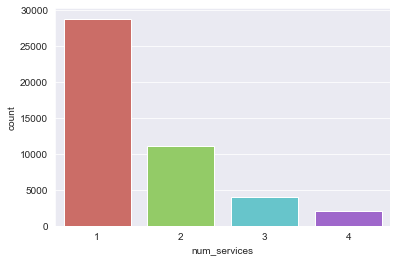

In [63]:
sns.countplot(x="num_services", data=churn, palette='hls');

## Transform Categorical Values to Binary or Multi-Class

In [64]:
churn.head()

acc_tenure  num_services   age  acc_type  service_tenure  plan_fee  \
INDEX                                                                       
1              46             1  30.0  CONSUMER              46     54.54   
2              60             3  55.0  CONSUMER              59     54.54   
3              65             1  29.0  CONSUMER              65     40.90   
4              31             1  51.0  CONSUMER              31     31.81   
5              95             1  31.0  CONSUMER              95     54.54   

      byo_status  plan_tenure  months_remaining  fix_last_duration  \
INDEX                                                                
1        NON BYO           15                 0                 24   
2        NON BYO            5                 0                 24   
3            BYO           15                 0                 12   
4        NON BYO           31                 0                 24   
5        NON BYO            0                 0                 24   

      contract_status  prev_contract_duration    brand  churn_ind  \
INDEX                                                               
1        OFF-CONTRACT                      24  SAMSUNG          1   
2        OFF-CONTRACT                      24    APPLE          1   
3        OFF-CONTRACT                      12    APPLE          1   
4        OFF-CONTRACT                      24    APPLE          1   
5        OFF-CONTRACT                      24    APPLE          1   

       monthly_spend   region state  
INDEX                                
1              61.40  COUNTRY    WA  
2              54.54    METRO   NSW  
3               2.50  COUNTRY    WA  
4               6.48  COUNTRY   VIC  
5             100.22    METRO   NSW

In [67]:
# transform acc_type to binary where consumer=1
churn_master['Consumer'] = np.where(
    churn_master.loc[:, 'acc_type'].str.contains('CONSUMER'), 1, 0)
churn_master = churn_master.drop('acc_type', axis=1)
churn_master.head()

KeyError: 'acc_type'

In [68]:
# transform byo_status to binary where BYO=1
churn_master['BYO'] = np.where(
    churn_master.loc[:, 'byo_status'].str.contains('BYO'), 1, 0)
churn_master = churn_master.drop('byo_status', axis=1)
churn_master.head()

acc_tenure  num_services   age  service_tenure  plan_fee  plan_tenure  \
INDEX                                                                          
1              46             1  30.0              46     54.54           15   
2              60             3  55.0              59     54.54            5   
3              65             1  29.0              65     40.90           15   
4              31             1  51.0              31     31.81           31   
5              95             1  31.0              95     54.54            0   

       months_remaining  fix_last_duration contract_status  \
INDEX                                                        
1                     0                 24    OFF-CONTRACT   
2                     0                 24    OFF-CONTRACT   
3                     0                 12    OFF-CONTRACT   
4                     0                 24    OFF-CONTRACT   
5                     0                 24    OFF-CONTRACT   

       prev_contract_duration    brand  churn_ind  monthly_spend   region  \
INDEX                                                                       
1                          24  SAMSUNG          1          61.40  COUNTRY   
2                          24    APPLE          1          54.54    METRO   
3                          12    APPLE          1           2.50  COUNTRY   
4                          24    APPLE          1           6.48  COUNTRY   
5                          24    APPLE          1         100.22    METRO   

      state  Consumer  BYO  
INDEX                       
1        WA         1    1  
2       NSW         1    1  
3        WA         1    1  
4       VIC         1    1  
5       NSW         1    1

In [ ]:
# transform contract_status to multiclass where BYO=1
churn_master['BYO'] = np.where(
    churn_master.loc[:, 'byo_status'].str.contains('BYO'), 1, 0)
churn_master = churn_master.drop('byo_status', axis=1)
churn_master.head()

## Analysis of Relationships

In [49]:
# more churners for different age groups?

In [76]:
# in addition to previous, tenure correlated with age?

In [50]:
# are people who pay more more or less likely to churn?

In [51]:
# are people on BYO more or less likely to churn?

In [52]:
# are people from different regions more or less likely to churn?

In [ ]:
# 

## Feature Normalisation / Transformation

In [ ]:
# transform age to months

In [ ]:
# transform service tenure logarithmically

In [ ]:
# normalise features

# Baseline Model: Logistic Regression
assumptions:
- absence of multicollinearity
- no outliers
- independent variables are linearly related to log odds

## Feature Engineering

Since logistic regression susceptible to the curse of dimensionality, another algorithm will be used to improve performance.

# Naive Bayes

In [125]:
# check baseline i.e. churn classification distribution without learning